Weka is an analysis tool for machine learning providing many built-in methods for classification and regression given the data is in correct input format. Therefore we decided to test our processed data with different regression methods to see if it provides better results than neural networks. M5P algorithm provided the best results for the given dataset. 

#### M5P Algorithm

Originially, Decision trees are not originally designed for continuous classes.
M5P uses Model-Trees for predictions of continuos classes
Model-Trees combine a conventional decision tree with possibility of regression function at the nodes!

#### Following plots show predictions of a trained M5P model in weka
80% of the data was used for training and 20% was used for testing

#### Features used to make the model tree are as follows 
AMO:KBO:GCC:01:PRESS, 
AMO:LMP:GCC:10:PRESS, 
AMO:LMP:GCC:11:PRESS, 
AMO:LMP:VG:01:PRESS, 
AMO:LMP:VG:02:PRESS, 
AMO:LMP:VG:20:PRESS, 
AMO:LMP:VG:21:PRESS, 
AMO:LMP:VG:30:PRESS, 
AMO:LMP:VG:31:PRESS, 
AMO:LMP:VG:40:PRESS, 
AMO:LMP:VG:41:PRESS, 
AMO:LMP:VG:42:PRESS, 
AMO:LMP:VG:43:PRESS, 
AMO:R10:RMO:TEMP, 
AMO:R11:RMO:TEMP, 
AMO:R12:RMO:TEMP, 
AMO:R13:RMO:TEMP, 
AMO:R14:RMO:TEMP, 
AMO:R15:RMO:TEMP, 
AMO:R16:RMO:TEMP, 
AMO:SAS:GCC:01:PRESS, 
AMO:SAS:GCC:02:PRESS, 
uDamageMask, 
fEbeamCharge, 
fEbeamL3Energy, 
fEbeamLTUPosX, 
fEbeamLTUPosY, 
fEbeamLTUAngX, 
fEbeamLTUAngY, 
fEbeamPkCurrBC2, 
fEbeamEnergyBC2, 
fEbeamPkCurrBC1, 
fEbeamEnergyBC1, 
fEbeamUndPosX, 
fEbeamUndPosY, 
fEbeamUndAngX, 
fEbeamUndAngY, 
fEbeamXTCAVAmpl, 
fEbeamXTCAVPhase, 
fEbeamDumpCharge, 
fEbeamPhotonEnergy, 
fEbeamLTU250, 
fEbeamLTU450, 
f_11_ENRC, 
f_12_ENRC, 
f_21_ENRC, 
f_22_ENRC, 
f_63_ENRC, 
f_64_ENRC, 
fFitTime1, 
fFitTime2, 
fCharge1, 
fCharge2, 

Model-tree was made in Weka and predicted results along with original values and 'fEbeamL3Energy' parameter were saved in csv file after processing. Further, CSV files were loaded in notebook and respective graphs are plotted

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import h5py 
from scipy import stats
from scipy.optimize import minimize

from sklearn.linear_model import Lasso
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score as r2
from sklearn.metrics import mean_squared_error as mse
import os
rmse = lambda y_true, y_pred: mse(y_true, y_pred)

%matplotlib inline

In [16]:
path = os.getcwd()

In [17]:
files = []
# r=root, d=directories, f = files
for r, d, f in os.walk(path+'/weka_pred'):
    files.append(f)
files = files[0]
files

['pred_mean_pe.csv',
 'pred_com_pe.csv',
 'pred_argmax_it.csv',
 'pred_scaling_pe.csv',
 'pred_sigma_pe.csv',
 'pred_argmax_pe.csv',
 'pred_mean_it.csv',
 'pred_com_it.csv']

import processed files from weka and plot graphs along with their R2 and RMSE values

pred_mean_pe.csv R2: 0.00698 RMSE: 38.0


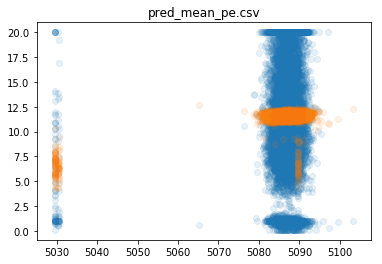

pred_com_pe.csv R2: 0.358 RMSE: 12.7


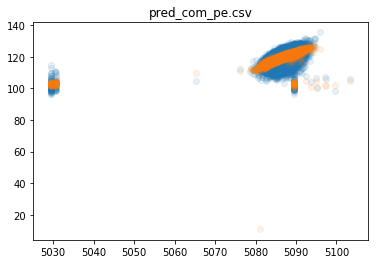

pred_argmax_it.csv R2: 0.00283 RMSE: 8.8


pred_scaling_pe.csv R2: 0.0706 RMSE: 2.64e+02


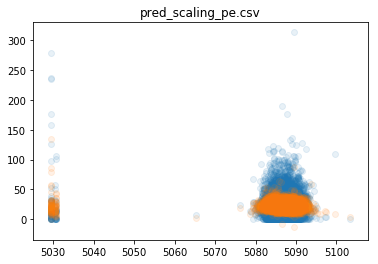

pred_sigma_pe.csv R2: 0.305 RMSE: 17.2


pred_argmax_pe.csv R2: 0.173 RMSE: 42.9


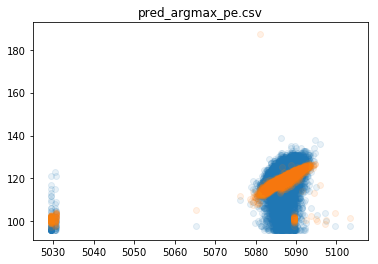

pred_mean_it.csv R2: 0.882 RMSE: 0.134


pred_com_it.csv R2: 0.0203 RMSE: 0.83


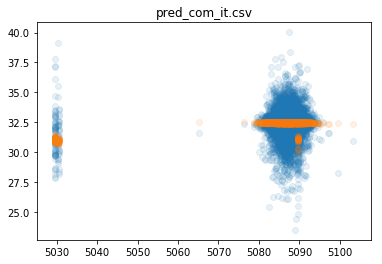

In [18]:
for f in files:
    data = pd.read_csv('./weka_pred/'+f)
#     print(data.shape)
    res_r2 = r2(data.actual.values.ravel(), data.predicted.values.ravel())
    res_rmse = np.square(data.actual.values - data.predicted.values).mean()
    
#     print(type(data.actual.dtype))
    
    print('{} R2: {:.3} RMSE: {:.3}'.format(f, res_r2, res_rmse))
    plt.scatter(data.fEbeamL3Energy.values, data.actual, alpha=0.1)
    plt.scatter(data.fEbeamL3Energy.values, data.predicted, alpha=0.1)
    plt.title(f)
    plt.show()